In [20]:
import cv2
import pandas as pd
import mediapipe as mp
from PIL import Image

import os
from random import randint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle
import cv2

from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,make_scorer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from random import uniform
from scipy.stats import randint
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,log_loss

import io
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dropout

import sklearn
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


import numpy as np
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.models import load_model
from sklearn.model_selection import cross_val_score

from tensorflow.keras.optimizers import Adam

from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import GridSearchCV
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
#import matplotlib as plt
from keras.callbacks import LearningRateScheduler
import numpy as np


from tensorflow.keras.models import save_model
import tensorflow as tf

#pip install tensorflow==2.7.0 --user

In [45]:
#importing required libraries from mediapipe to draw and to perfom pose estimation from the video
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

#Initializing an empty dataframe with the required body landmarks as columns
df = pd.DataFrame(columns = ['NOSE_X', 'NOSE_Y', 'NOSE_Z', 'LEFT_SHOULDER_X', 'LEFT_SHOULDER_Y',
       'LEFT_SHOULDER_Z', 'RIGHT_SHOULDER_X', 'RIGHT_SHOULDER_Y',
       'RIGHT_SHOULDER_Z', 'LEFT_ELBOW_X', 'LEFT_ELBOW_Y', 'LEFT_ELBOW_Z',
       'RIGHT_ELBOW_X', 'RIGHT_ELBOW_Y', 'RIGHT_ELBOW_Z', 'LEFT_WRIST_X',
       'LEFT_WRIST_Y', 'LEFT_WRIST_Z', 'RIGHT_WRIST_X', 'RIGHT_WRIST_Y',
       'RIGHT_WRIST_Z', 'LEFT_HIP_X', 'LEFT_HIP_Y', 'LEFT_HIP_Z',
       'RIGHT_HIP_X', 'RIGHT_HIP_Y', 'RIGHT_HIP_Z', 'LEFT_KNEE_X',
       'LEFT_KNEE_Y', 'LEFT_KNEE_Z', 'RIGHT_KNEE_X', 'RIGHT_KNEE_Y',
       'RIGHT_KNEE_Z', 'LEFT_ANKLE_X', 'LEFT_ANKLE_Y', 'LEFT_ANKLE_Z',
       'RIGHT_ANKLE_X', 'RIGHT_ANKLE_Y', 'RIGHT_ANKLE_Z', 'LEFT_HEEL_X',
       'LEFT_HEEL_Y', 'LEFT_HEEL_Z', 'RIGHT_HEEL_X', 'RIGHT_HEEL_Y',
       'RIGHT_HEEL_Z', 'LEFT_FOOT_INDEX_X', 'LEFT_FOOT_INDEX_Y',
       'LEFT_FOOT_INDEX_Z', 'RIGHT_FOOT_INDEX_X', 'RIGHT_FOOT_INDEX_Y',
       'RIGHT_FOOT_INDEX_Z'])


#Reading the video using CV2
cap = cv2.VideoCapture(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dataset\individual serves - side camera\cameron's serves\cam 2 slow.mov")
#output_file = r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dataset\individual serves - side camera\Kev's Serves\output_data.json"
pose = mp.solutions.pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=2)

# The mininimum detection confidance and tracking confidence of mediapipe is set to 0.5 and while video is opened the it is
# extracted into frames and landmarks are extracted from each frame and saved it as each row of dataframe 'df'

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
            
        
        ret, frame = cap.read()


        #flipped_frame = cv2.flip(frame, 1)

        #pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

        #pil_image.show()


        if not ret:

            break

        else:
            #print(ret,"\n")
            RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


            results = pose.process(RGB)

            if results.pose_landmarks == None:

                continue

            else:

                landmarks = results.pose_landmarks.landmark

                #print("Cord------",landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x)

                nose_x =  landmarks[mp_pose.PoseLandmark.NOSE.value].x
                nose_Y =  landmarks[mp_pose.PoseLandmark.NOSE.value].y
                nose_z =  landmarks[mp_pose.PoseLandmark.NOSE.value].z

                left_sho_x = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x
                left_sho_y = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y
                left_sho_z = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].z

                right_sho_x = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x
                right_sho_y = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y
                right_sho_z = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].z

                left_elb_x = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x
                left_elb_y = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y
                left_elb_z = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].z

                right_elb_x = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x
                right_elb_y = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y
                right_elb_z = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].z

                left_wrist_x = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x
                left_wrist_y = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y
                left_wrist_z = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].z

                right_wrist_x = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x
                right_wrist_y = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y
                right_wrist_z = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].z

                left_hip_x = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x
                left_hip_y = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y
                left_hip_z = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].z

                right_hip_x = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x
                right_hip_y = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y
                right_hip_z = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].z

                left_knee_x = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x
                left_knee_y = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y
                left_knee_z = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].z

                right_knee_x = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x
                right_knee_y = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y
                right_knee_z = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].z           

                left_ankle_x = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x
                left_ankle_y = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y
                left_ankle_z = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].z

                right_ankle_x = landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x
                right_ankle_y = landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y
                right_ankle_z = landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].z

                left_heel_x = landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x
                left_heel_y = landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y
                left_heel_z = landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].z

                right_heel_x = landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].x
                right_heel_y = landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].y
                right_heel_z = landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].z

                left_foot_index_x = landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].x
                left_foot_index_y = landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].y
                left_foot_index_z = landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].z

                right_foot_index_x = landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].x
                right_foot_index_y = landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].y
                right_foot_index_z = landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].z

                #res_list.append([nose_x,nose_Y,nose_z,left_sho_x,left_sho_y,left_sho_z,right_sho_x,right_sho_y,right_sho_z,left_elb_x,left_elb_y,left_elb_z,right_elb_x,right_elb_y,right_elb_z,left_wrist_x,left_wrist_y,left_wrist_z,right_wrist_x,right_wrist_y,right_wrist_z,left_hip_x,left_hip_y,left_hip_z,right_hip_x,right_hip_y,right_hip_z,left_knee_x,left_knee_y,left_knee_z,right_knee_x,right_knee_y,right_knee_z,left_ankle_x,left_ankle_y,left_ankle_z,right_ankle_x,right_ankle_z,left_heel_x,left_heel_y,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z])


                data_row = [nose_x,nose_Y,nose_z,left_sho_x,left_sho_y,left_sho_z,right_sho_x,right_sho_y,right_sho_z,left_elb_x,left_elb_y,left_elb_z,right_elb_x,right_elb_y,right_elb_z,left_wrist_x,left_wrist_y,left_wrist_z,right_wrist_x,right_wrist_y,right_wrist_z,left_hip_x,left_hip_y,left_hip_z,right_hip_x,right_hip_y,right_hip_z,left_knee_x,left_knee_y,left_knee_z,right_knee_x,right_knee_y,right_knee_z,left_ankle_x,left_ankle_y,left_ankle_z,right_ankle_x,right_ankle_y,right_ankle_z,left_heel_x,left_heel_y,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z]

            
                
                df.loc[len(df)] = data_row
                #print("---------",data_row)
                #df.append(data_row, ignore_index=True)

        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # show the final output
        #cv2.imshow(r"Output", frame)

In [46]:
#ball_release = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\tossstartframes.csv",header=None)
data_path = r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dataset\CSVs\\"
#test_data = pd.read_excel(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dataset\model_inout\test_25-06.xlsx")
frames = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\frames.csv")
#cont_frames = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dataset\contactframes.csv")
#ball_toss = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\tossstartframes.csv")

In [47]:
#Function for data prepration: It classifyies the 'Class 1' and 'Class 2' and integrate the complete files into a single dataframe.

def classify_data(range_value,file,data_path):
    data_list = []
    class_list = []
    ball_toss = []
    
    df = pd.DataFrame()
    
    #print("---------",frames)
    for i in range(len(file)):
            #print(i)
            file_name = file.iloc[i][0]
            #print("----",file_name)
            toss_row = file.iloc[i][1]
            hit_row = file.iloc[i][2]

            for csv in os.listdir(data_path): 
                
                if file_name in csv:
                        #print("\n",file_name)
                        data = pd.read_csv(data_path+"\\"+csv)
                        #print(data)
                        
                        
                        
                        class_list = ["Before" for i in range(0,toss_row-range_value)]
                        class_list.extend(["Toss" for i in range(toss_row-range_value,toss_row+range_value)])
                        class_list.extend(["Prep" for i in range(toss_row+range_value,hit_row-range_value)])
                        class_list.extend(["Hit" for i in range(hit_row-range_value,hit_row+range_value)])
                        class_list.extend(["After" for i in range(hit_row+range_value,len(data))])

                        #ball_toss = ["Before Toss" for i in range(0,toss_row-range_value)]
                        #ball_toss.extend(["Toss" for i in range(toss_row-range_value,toss_row+range_value)])
                        #ball_toss.extend(["After Toss" for i in range(toss_row+range_value,len(data))])

                        
                        file_list = [file_name for i in range(len(class_list))]
                        #print("\n---------------",file_list,"\n\n\n\n****************",class_list)
                        
                        data = data.assign(File=file_list,Class=class_list)
                        data_list.append(data)   
                        dataframe = pd.concat(data_list)
                        #print(dataframe)
                        
    return dataframe

In [48]:
#Function to calculate the angle between two body landmark

def cal_ang(i,j,k,l):
    
    
    angle_rad = []
    sho_rand_angle = []
    
    for x1,y1,x2,y2 in zip(i,j,k,l):
        
        
    
        angle_rad.append(math.atan2( y2 - y1 , x2 - x1 ))
        #angle_deg = math.degrees(angle_rad)
        #nose_wrist_angle.append(pygame.math.Vector2(x1, y1).angle_to((x2, y2)))
    
        
    return angle_rad


In [49]:
def pred_check(arr):

    for i in range(len(arr) - 1):
        
        if (arr[i] == 1 and arr[i-1] == 1) and (arr[i + 1] == 0 ) :
            
            arr[i + 1] = 2
        
        elif (arr[i] == 2)  and (arr[i + 1] == 1):
            arr[i + 1] = 0
        
        elif (arr[i] == 0 and arr[i+1] == 1):
            arr[i+1] = 0
        
    
    return arr


In [50]:
feature_columns = ['NOSE_X', 'NOSE_Y', 'NOSE_Z', 'LEFT_SHOULDER_X', 'LEFT_SHOULDER_Y',
       'LEFT_SHOULDER_Z', 'RIGHT_SHOULDER_X', 'RIGHT_SHOULDER_Y',
       'RIGHT_SHOULDER_Z', 'LEFT_ELBOW_X', 'LEFT_ELBOW_Y', 'LEFT_ELBOW_Z',
       'RIGHT_ELBOW_X', 'RIGHT_ELBOW_Y', 'RIGHT_ELBOW_Z', 'LEFT_WRIST_X',
       'LEFT_WRIST_Y', 'LEFT_WRIST_Z', 'RIGHT_WRIST_X', 'RIGHT_WRIST_Y',
       'RIGHT_WRIST_Z', 'LEFT_HIP_X', 'LEFT_HIP_Y', 'LEFT_HIP_Z',
       'RIGHT_HIP_X', 'RIGHT_HIP_Y', 'RIGHT_HIP_Z', 'LEFT_KNEE_X',
       'LEFT_KNEE_Y', 'LEFT_KNEE_Z', 'RIGHT_KNEE_X', 'RIGHT_KNEE_Y',
       'RIGHT_KNEE_Z', 'LEFT_ANKLE_X', 'LEFT_ANKLE_Y', 'LEFT_ANKLE_Z',
       'RIGHT_ANKLE_X', 'RIGHT_ANKLE_Y', 'RIGHT_ANKLE_Z', 'LEFT_HEEL_X',
       'LEFT_HEEL_Y', 'LEFT_HEEL_Z', 'RIGHT_HEEL_X', 'RIGHT_HEEL_Y',
       'RIGHT_HEEL_Z', 'LEFT_FOOT_INDEX_X', 'LEFT_FOOT_INDEX_Y',
       'LEFT_FOOT_INDEX_Z', 'RIGHT_FOOT_INDEX_X', 'RIGHT_FOOT_INDEX_Y',
       'RIGHT_FOOT_INDEX_Z' ,'Left_Sho_Wrist_Angle','Nose_Left_Wrist','Nose_Left_Elbow','Nose_Right_Wrist_Angle','Right_Sho_Wrist Angle','Nose_Right_Elbow']

In [26]:
len(feature_columns)

57

In [51]:
#The raw data is used to calculate the angles and then 'Class 1' and 'Class 2' extracted and all these values are
#added to the dataframe

model_data = classify_data(12,frames,data_path)


nose_ryt_wrist = cal_ang(model_data['NOSE_X'],model_data['NOSE_Y'],model_data['RIGHT_WRIST_X'],model_data['RIGHT_WRIST_Y'])
sho_ryt_wrist = cal_ang(model_data['RIGHT_SHOULDER_X'],model_data['RIGHT_SHOULDER_Y'],model_data['RIGHT_WRIST_X'],model_data['RIGHT_WRIST_Y'])
nose_ryt_elb = cal_ang(model_data['NOSE_X'],model_data['NOSE_Y'],model_data['RIGHT_ELBOW_X'],model_data['RIGHT_ELBOW_Y'])

sho_left_wrist = cal_ang(model_data['LEFT_SHOULDER_X'],model_data['LEFT_SHOULDER_Y'],model_data['LEFT_WRIST_X'],model_data['LEFT_WRIST_Y'])
nose_left_wrist = cal_ang(model_data['NOSE_X'],model_data['NOSE_Y'],model_data['LEFT_WRIST_X'],model_data['LEFT_WRIST_Y'])
nose_left_elb = cal_ang(model_data['NOSE_X'],model_data['NOSE_Y'],model_data['LEFT_ELBOW_X'],model_data['LEFT_ELBOW_Y'])


model_data['Nose_Right_Wrist_Angle'] = nose_ryt_wrist 
model_data['Right_Sho_Wrist Angle'] = sho_ryt_wrist
model_data['Nose_Right_Elbow'] = nose_ryt_elb
model_data['Left_Sho_Wrist_Angle'] = sho_left_wrist
model_data['Nose_Left_Wrist'] = nose_left_wrist
model_data['Nose_Left_Elbow'] = nose_left_elb


In [61]:
model_data = model_data.drop(columns="Timestamp")

In [44]:
df = model_data

In [18]:
df = df.drop('Unnamed: 51',axis=1)

In [68]:
data = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Model_out\DataSet.csv")

In [82]:
data.columns

Index(['NOSE_X', 'NOSE_Y', 'NOSE_Z', 'LEFT_SHOULDER_X', 'LEFT_SHOULDER_Y',
       'LEFT_SHOULDER_Z', 'RIGHT_SHOULDER_X', 'RIGHT_SHOULDER_Y',
       'RIGHT_SHOULDER_Z', 'LEFT_ELBOW_X', 'LEFT_ELBOW_Y', 'LEFT_ELBOW_Z',
       'RIGHT_ELBOW_X', 'RIGHT_ELBOW_Y', 'RIGHT_ELBOW_Z', 'LEFT_WRIST_X',
       'LEFT_WRIST_Y', 'LEFT_WRIST_Z', 'RIGHT_WRIST_X', 'RIGHT_WRIST_Y',
       'RIGHT_WRIST_Z', 'LEFT_HIP_X', 'LEFT_HIP_Y', 'LEFT_HIP_Z',
       'RIGHT_HIP_X', 'RIGHT_HIP_Y', 'RIGHT_HIP_Z', 'LEFT_KNEE_X',
       'LEFT_KNEE_Y', 'LEFT_KNEE_Z', 'RIGHT_KNEE_X', 'RIGHT_KNEE_Y',
       'RIGHT_KNEE_Z', 'LEFT_ANKLE_X', 'LEFT_ANKLE_Y', 'LEFT_ANKLE_Z',
       'RIGHT_ANKLE_X', 'RIGHT_ANKLE_Y', 'RIGHT_ANKLE_Z', 'LEFT_HEEL_X',
       'LEFT_HEEL_Y', 'LEFT_HEEL_Z', 'RIGHT_HEEL_X', 'RIGHT_HEEL_Y',
       'RIGHT_HEEL_Z', 'LEFT_FOOT_INDEX_X', 'LEFT_FOOT_INDEX_Y',
       'LEFT_FOOT_INDEX_Z', 'RIGHT_FOOT_INDEX_X', 'RIGHT_FOOT_INDEX_Y',
       'RIGHT_FOOT_INDEX_Z', 'Nose_Right_Wrist_Angle', 'Right_Sho_Wrist Angle',
     

In [83]:
model_data= data

In [54]:
df['NOSE_X']

'C:\\Users\\ASUS\\OneDrive\\Documents\\Academics\\Summer Semester\\Dissertation\\Model_out\\DataSet.csv'

In [52]:
nose_ryt_wrist = cal_ang(df['NOSE_X'],df['NOSE_Y'],df['RIGHT_WRIST_X'],df['RIGHT_WRIST_Y'])
sho_ryt_wrist = cal_ang(df['RIGHT_SHOULDER_X'],df['RIGHT_SHOULDER_Y'],df['RIGHT_WRIST_X'],df['RIGHT_WRIST_Y'])
nose_ryt_elb = cal_ang(df['NOSE_X'],df['NOSE_Y'],df['RIGHT_ELBOW_X'],df['RIGHT_ELBOW_Y'])

sho_left_wrist = cal_ang(df['LEFT_SHOULDER_X'],df['LEFT_SHOULDER_Y'],df['LEFT_WRIST_X'],df['LEFT_WRIST_Y'])
nose_left_wrist = cal_ang(df['NOSE_X'],df['NOSE_Y'],df['LEFT_WRIST_X'],df['LEFT_WRIST_Y'])
nose_left_elb = cal_ang(df['NOSE_X'],df['NOSE_Y'],df['LEFT_ELBOW_X'],df['LEFT_ELBOW_Y'])


df['Nose_Right_Wrist_Angle'] = nose_ryt_wrist 
df['Right_Sho_Wrist Angle'] = sho_ryt_wrist
df['Nose_Right_Elbow'] = nose_ryt_elb
df['Left_Sho_Wrist_Angle'] = sho_left_wrist
df['Nose_Left_Wrist'] = nose_left_wrist
df['Nose_Left_Elbow'] = nose_left_elb


TypeError: string indices must be integers

In [84]:
#Splitting data for training and prediction

input_data = model_data[:40747]
#test = model_data[1:1205]
test_kev = model_data[40747:]



X = model_data[feature_columns]
Y = model_data['Class']

label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [85]:
label_encoder.classes_

array(['After', 'Before', 'Hit', 'Prep', 'Toss'], dtype=object)

In [87]:
alp = np.logspace(-10, 10, 100)  

lasso_cv = LassoCV(alphas=alp, cv=6)  

lasso_cv.fit(X_train, y_train)

alpha_val = lasso_cv.alpha_

print("Best Alpha:", alpha_val)

final_lasso = Lasso(alpha=alpha_val)
final_lasso.fit(X_train, y_train)

y_pred = final_lasso.predict(X_test)
mean_sq_err = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mean_sq_err)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.869689132048734, tolerance: 3.316617192852116
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.83596449241304, tolerance: 3.316617192852116
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93.67300262750814, tolerance: 3.316617192852116
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: Conver

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3253.111054498511, tolerance: 3.316617192852116
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3252.4262843243655, tolerance: 3.316617192852116
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3251.7697748769515, tolerance: 3.316617192852116
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: Conv

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3257.050732807337, tolerance: 3.321741422145181
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3256.178448419939, tolerance: 3.321741422145181
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3255.1255208326384, tolerance: 3.321741422145181
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: Conve

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281.68481246884403, tolerance: 3.336716238857712
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312.5187489144746, tolerance: 3.336716238857712
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 536.8800903723277, tolerance: 3.336716238857712
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: Conve

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3262.131414097956, tolerance: 3.336716238857712
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3261.208461361001, tolerance: 3.336716238857712
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3260.3132234195173, tolerance: 3.336716238857712
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: Conve

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.38062745057505, tolerance: 3.320874343842843
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89.74915789544139, tolerance: 3.320874343842843
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.45251649595957, tolerance: 3.320874343842843
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: Conver

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3193.3408276801047, tolerance: 3.320874343842843
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3192.6302449927202, tolerance: 3.320874343842843
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.87265580577878, tolerance: 3.3042524554308272
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: Con

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4108.213993478774, tolerance: 3.982019509594866
  model = cd_fast.enet_coordinate_descent(


Best Alpha: 1e-10
Mean Squared Error: 0.29957316117122246


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4108.213993478774, tolerance: 3.982019509594866
  model = cd_fast.enet_coordinate_descent(


In [88]:
#By using the alphe value from previos step, finding the feature the infleance the output most.
#Best Alpha: 1e-06
#Mean Squared Error: 0.10416667916202277

coef_lis =[]

lasso = Lasso(alpha=1e-10)

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mean_sq_err = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mean_sq_err)

coeff = pd.DataFrame({'Features': X_train.columns, 'Coefficients': lasso.coef_})


for i,j in zip(coeff['Features'],coeff['Coefficients']):
    if (j>0.01 or j<-0.01):
        coef_lis.append(i)

#for j in range(len(coeff)):
    #if coeff.iloc[j][1]!= i>0.01 or coeff.iloc[j][1]!= i<-0.01:
        #c((coeff.iloc[j][0]))
        
        
        
#coef_lis.append('Nose_Right_Wrist_Angle')
#coef_lis.append('Right_Sho_Wrist Angle') 
#coef_lis.append('Nose_Right_Elbow')
         
        
#coef_lis.append('Left_Sho_Wrist_Angle')
#coef_lis.append('Nose_Left_Wrist') 
#coef_lis.append('Nose_Left_Elbow')
    
print(coef_lis)

Mean Squared Error: 0.29957316117122246
['LEFT_SHOULDER_Z', 'LEFT_ELBOW_X', 'LEFT_ELBOW_Z', 'LEFT_HIP_X', 'RIGHT_HIP_Z', 'Left_Sho_Wrist_Angle', 'Nose_Left_Wrist', 'Nose_Left_Elbow', 'Nose_Right_Wrist_Angle', 'Right_Sho_Wrist Angle', 'Nose_Right_Elbow']


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4108.213993478774, tolerance: 3.982019509594866
  model = cd_fast.enet_coordinate_descent(


In [53]:
print(([i for i in coeff['Coefficients'] if (i>0.01 or i<-0.01)]))

[0.01297337396686898, 0.01220480403920476, -0.0179111018906866, -0.01635260337769221, 0.011736211674369747, -0.05831453982060606, -0.04684548377038655, -0.033987527333995515, -0.031743919763601885, -0.05120769979692899, 0.12495218489576589]


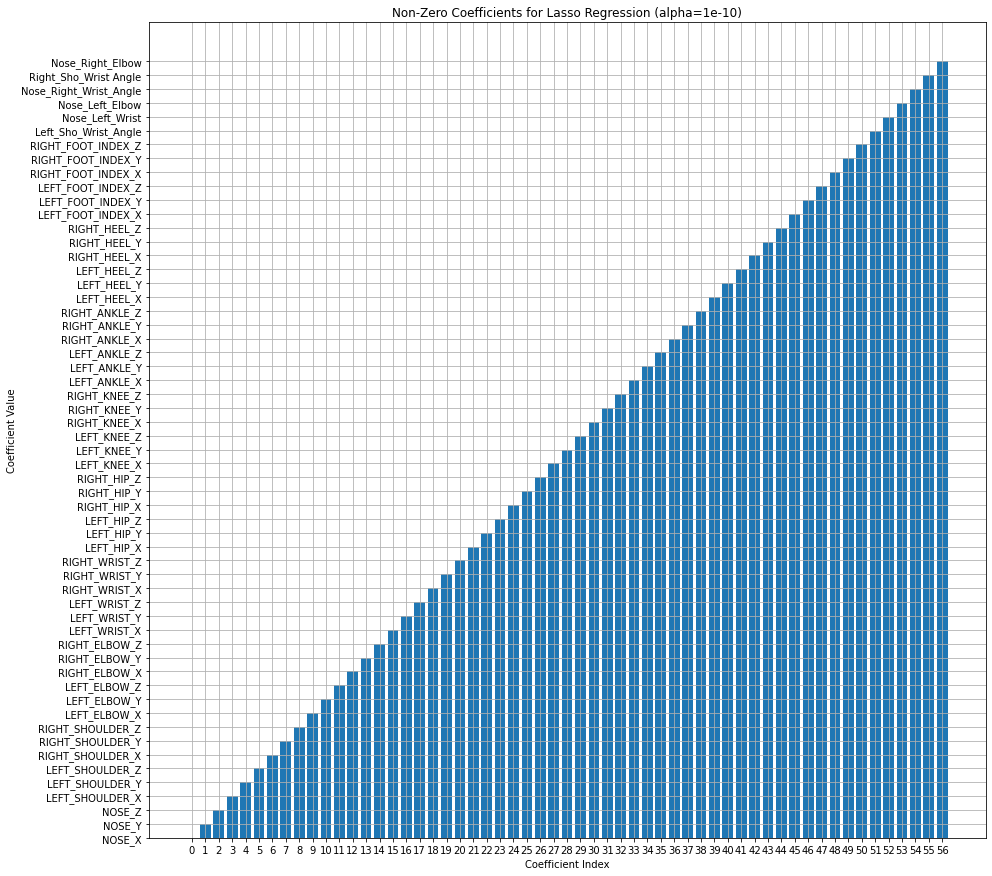

In [20]:
plt.figure(figsize=(15, 15))
plt.bar(range(len(coef_lis)), coef_lis)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Non-Zero Coefficients for Lasso Regression (alpha=1e-10)')
plt.xticks(range(len(coef_lis)), [str(i) for i in range(len(coef_lis))])
plt.grid(True)
plt.show()

In [54]:
for i,j in zip(coeff['Coefficients'],coef_lis):
    if (i>0.01 or i<-0.01):
        print(i,"---------",j)

0.01297337396686898 --------- LEFT_SHOULDER_Z
0.01220480403920476 --------- LEFT_ELBOW_X
-0.0179111018906866 --------- LEFT_ELBOW_Z
-0.01635260337769221 --------- LEFT_HIP_X
0.011736211674369747 --------- RIGHT_HIP_Z
-0.05831453982060606 --------- Left_Sho_Wrist_Angle
-0.04684548377038655 --------- Nose_Left_Wrist
-0.033987527333995515 --------- Nose_Left_Elbow
-0.031743919763601885 --------- Nose_Right_Wrist_Angle
-0.05120769979692899 --------- Right_Sho_Wrist Angle


In [68]:
#Creating new train-test split using the newly found features
new_X = model_data[coef_lis]
new_X_train, new_X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3, random_state= None,shuffle=True)

In [69]:
X_to_test = test_kev[coef_lis]

In [48]:
new_X = df[coef_lis]

In [70]:
new_X

,LEFT_SHOULDER_Z,LEFT_ELBOW_X,LEFT_ELBOW_Z,LEFT_HIP_X,RIGHT_HIP_Z,Left_Sho_Wrist_Angle,Nose_Left_Wrist,Nose_Left_Elbow,Nose_Right_Wrist_Angle,Right_Sho_Wrist Angle,Nose_Right_Elbow
0,0.097256,0.385520,0.218673,0.374279,-0.154749,1.253485,1.380747,1.629800,2.184579,1.664838,2.497794
1,0.175091,0.382995,0.261512,0.373840,-0.155073,1.278204,1.406325,1.649709,2.187863,1.663589,2.507557
2,0.185736,0.380898,0.270470,0.373335,-0.155450,1.292996,1.420526,1.666095,2.189647,1.664194,2.510686
3,0.178089,0.379626,0.265612,0.372936,-0.155461,1.298850,1.426114,1.675857,2.190554,1.663929,2.511905
4,0.171813,0.379061,0.260608,0.372508,-0.155767,1.301431,1.428055,1.680128,2.191076,1.662867,2.512940
...,...,...,...,...,...,...,...,...,...,...,...
789,68.100954,415.794711,93.601992,445.072246,-68.932123,-1.903740,-2.220360,-2.439770,-1.717207,-1.676663,-1.761567
790,62.849430,415.832670,89.056109,445.497129,-68.884964,-1.899850,-2.218322,-2.438111,-1.705543,-1.661155,-1.756199
791,63.582843,416.055186,89.975699,445.943856,-68.919752,-1.895237,-2.214868,-2.435621,-1.702983,-1.657132,-1.749919
792,64.661601,416.133978,92.334552,446.216304,-69.235936,-1.887328,-2.209066,-2.430917,-1.682290,-1.628947,-1.742389


*RANDOM SEARCH FOR HIT*

In [15]:
#Defing the range of values to be validated for each parameter

#param_grid = {'max_depth': [6, 10, 15, 20],'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],'gamma': [0, 0.25, 0.5, 1.0],'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],'n_estimators': [100]}

param_grid = {
    "n_estimators": [100,150],  # Number of boosting rounds
    "max_depth": [3, 4, 5, 6],  # Maximum depth of trees
    "min_child_weight": randint(1, 10),  # Minimum sum of instance weight in a child node
    "gamma": [0, 0.1, 0.2, 0.3],  # Minimum loss reduction required for further partition
    "reg_alpha": [0, 0.1, 0.2, 0.3],  # L1 regularization term on weights
    "reg_lambda": [0, 0.1, 0.2, 0.3],  # L2 regularization term on weights
    "scale_pos_weight": [1, 3, 5],  # Handling class imbalance
}



In [16]:
#XG Boost classifier defenition
xg_model = XGBClassifier(objective="multi:softmax", num_class=3)

In [ ]:
#The best hyperparameters are extracted by running 5 fold random search CV to find the 100 parameter combinations and it is splitted using StratifiedKFold to preserve
# the class distribution.
 
folds = 5
param_comb = 100     
     
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = None)

random_search = RandomizedSearchCV(xg_model, param_distributions=param_grid, n_iter=param_comb, scoring='f1_macro', cv=skf.split(X_train,y_train), verbose=3, random_state=None )
random_search.fit(new_X_train, y_train)

In [43]:
random_search.best_params_

{'gamma': 0,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 100,
 'reg_alpha': 0.1,
 'reg_lambda': 0.2,
 'scale_pos_weight': 3}

In [82]:
clf = RandomForestClassifier(max_depth= 4,n_estimators= 150) 
clf.fit(new_X_train, y_train) 
y_pred = clf.predict(new_X_test)

In [91]:
model_data.iloc[:200]

,NOSE_X,NOSE_Y,NOSE_Z,LEFT_SHOULDER_X,LEFT_SHOULDER_Y,LEFT_SHOULDER_Z,RIGHT_SHOULDER_X,RIGHT_SHOULDER_Y,RIGHT_SHOULDER_Z,LEFT_ELBOW_X,...,RIGHT_FOOT_INDEX_Y,RIGHT_FOOT_INDEX_Z,File,Class,Nose_Right_Wrist_Angle,Right_Sho_Wrist Angle,Nose_Right_Elbow,Left_Sho_Wrist_Angle,Nose_Left_Wrist,Nose_Left_Elbow
0,0.393201,0.422577,-0.261642,0.387936,0.485447,0.097256,0.280079,0.473706,-0.379060,0.385520,...,0.876692,-0.519742,Lak2,Before,2.184579,1.664838,2.497794,1.253485,1.380747,1.629800
1,0.393207,0.423227,-0.160749,0.386230,0.485303,0.175091,0.279769,0.473445,-0.302719,0.382995,...,0.878136,-0.545627,Lak2,Before,2.187863,1.663589,2.507557,1.278204,1.406325,1.649709
2,0.393215,0.423485,-0.150250,0.385456,0.485172,0.185736,0.279787,0.473365,-0.293013,0.380898,...,0.878858,-0.541710,Lak2,Before,2.189647,1.664194,2.510686,1.292996,1.420526,1.666095
3,0.393198,0.423656,-0.157523,0.385134,0.485154,0.178089,0.279732,0.473381,-0.295993,0.379626,...,0.879190,-0.539156,Lak2,Before,2.190554,1.663929,2.511905,1.298850,1.426114,1.675857
4,0.393174,0.423814,-0.167579,0.385034,0.485031,0.171813,0.279611,0.473405,-0.301945,0.379061,...,0.879831,-0.529378,Lak2,Before,2.191076,1.662867,2.512940,1.301431,1.428055,1.680128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.411035,0.437880,-0.225619,0.376133,0.479017,0.137451,0.289482,0.465377,-0.410517,0.380763,...,0.878016,-0.252286,Lak2,Before,2.264255,1.801673,2.538633,1.156254,1.446077,1.832119
196,0.411115,0.437849,-0.221293,0.375926,0.479263,0.141091,0.289495,0.465381,-0.404152,0.379341,...,0.878183,-0.241748,Lak2,Before,2.266103,1.803719,2.540880,1.152769,1.449743,1.844843
197,0.411198,0.437835,-0.220360,0.375850,0.479397,0.141600,0.289492,0.465376,-0.403663,0.378618,...,0.878339,-0.247295,Lak2,Before,2.267172,1.804637,2.542617,1.152137,1.452574,1.851849
198,0.411266,0.437819,-0.221058,0.375806,0.479436,0.140524,0.289474,0.465362,-0.405362,0.378449,...,0.878409,-0.245455,Lak2,Before,2.267906,1.805078,2.543830,1.150243,1.453088,1.854329


In [83]:
pred = clf.predict(X_to_test)

In [ ]:
0'After'
1'Before'
2'Hit'
3'Prep'
4'Toss'

In [92]:
xgb_model = XGBClassifier(objective="multi:softmax", num_class=5)
xgb_model.fit(new_X_train, y_train) 
y_pred = xgb_model.predict(new_X_test)

In [95]:
xgb_model.predict(X_to_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [73]:
param_dist = {
    "class_weight": ["balanced", "balanced_subsample"],
    "max_depth": [3,4,5], 
    "max_features": randint(4, 11), 
    "min_samples_split": randint(2, 11), 
    "bootstrap": [True, False], 
    "criterion": ["gini", "entropy"]}


In [74]:
clf = RandomForestClassifier(n_estimators=100)
  
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=5)
random_search.fit(new_X_train, y_train)     

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [75]:
random_search.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 9,
 'min_samples_split': 9}

In [44]:
random_search.best_score_

0.9870915203212209

In [23]:
random_search.best_index_

36

In [ ]:
pickleFile.feature_names_in_

In [55]:
y_pred = random_search.predict(new_X_test)

NameError: name 'random_search' is not defined

In [78]:
accuracy = accuracy_score(y_test, y_pred)

acc,cf,cl = model_perfomance(y_test, y_pred)
print("Accuracy:", acc,"\t","conf\t",cf,"Class\t",cl)

Accuracy: 0.9577148359143064 	 conf	 [[5996  166  242]
 [  16 5569   99]
 [   2    2  371]] Class	               precision    recall  f1-score   support

           0       1.00      0.94      0.97      6404
           1       0.97      0.98      0.98      5684
           2       0.52      0.99      0.68       375

    accuracy                           0.96     12463
   macro avg       0.83      0.97      0.87     12463
weighted avg       0.97      0.96      0.96     12463



In [ ]:
#The best parameters extracted by Lasso is used and both XG Boost and Random Forest are trained and evaluated

*RF FOR HIT*

In [15]:
params = {'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 10,
 'min_samples_split': 10}
rf_hit_model = RandomForestClassifier(**params)

In [17]:
rf_hit_model.fit(new_X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=5, max_features=10, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [99]:
y_pred = rf_hit_model.predict(new_X_test)

In [100]:
acc,cf,cl = model_perfomance(y_test,y_pred)
print(acc,"---------",cf,"-------",cl)

0.9591591109684666 --------- [[6036  169  217]
 [  15 5533  107]
 [   0    1  385]] -------               precision    recall  f1-score   support

           0       1.00      0.94      0.97      6422
           1       0.97      0.98      0.97      5655
           2       0.54      1.00      0.70       386

    accuracy                           0.96     12463
   macro avg       0.84      0.97      0.88     12463
weighted avg       0.97      0.96      0.96     12463



In [102]:
rf_hit_model.base_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
accuracy_score(y_test,y_pred)

0.6784080879403033

*XGB FOR HIT*

In [22]:
#params = {
 #   'subsample': 0.7,
 #   'reg_lambda': 50.0,
 #   'n_estimators': 100,
 #   'min_child_weight': 5.0,
 #   'max_depth': 6,
 #   'learning_rate': 0.2,
 #   'gamma': 1.0,
 #   'colsample_bytree': 0.9,
 #   'colsample_bylevel': 0.4,}

params ={'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 10,
 'min_samples_split': 10,
 'eval_metric': f1_score}

params = {'gamma': 0,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 100,
 'reg_alpha': 0.1,
 'reg_lambda': 0.2,
 'scale_pos_weight': 3}

xgb_model = XGBClassifier(objective="multi:softmax", num_class=3, **params)

xgb_hitmodel.fit(new_X_train, y_train)

NameError: name 'xgb_hitmodel' is not defined

In [38]:
y_pred = xgb_hitmodel.predict(new_X_test)

In [42]:
xgb_hitmodel

XGBClassifier(base_score=None, booster=None, bootstrap=True, callbacks=None,
              class_weight='balanced_subsample', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, criterion='entropy',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=<function f1_score at 0x000001A53F4A7AF0>,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_features=10, max_leaves=None, min_child_weight=None,
              min_samples_split=10, missing=nan, monotone_constraints=None, ...)

In [ ]:
test = label_encoder.fit_transform(test_kev['Class_1'])

In [39]:
accuracy_score(y_test,y_pred)

0.9982347749338041

In [40]:
confusion_matrix(y_test,y_pred)

array([[3055,    0,    8],
       [   0, 9028,    8],
       [   4,    2,  358]], dtype=int64)

In [41]:
sklearn.metrics.classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3063\n           1       1.00      1.00      1.00      9036\n           2       0.96      0.98      0.97       364\n\n    accuracy                           1.00     12463\n   macro avg       0.99      0.99      0.99     12463\nweighted avg       1.00      1.00      1.00     12463\n'

In [57]:
y_h_pred = y_pred = model.predict(X_to_test)

In [59]:
y_h_pred = pred_check(y_h_pred)

In [27]:
pickle.dump(rf_hit_model, open(r'C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Toss model\rf_hit_model.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Hit model\xgb_model.pkl', 'rb'))

*RF FOR TOSS*

In [38]:
#params = {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 10, 'min_samples_split': 2}

params = {'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 9,
 'min_samples_split': 9}

rf_tossmodel = RandomForestClassifier(**params)


rf_tossmodel.fit(new_X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
y_pred = rf_tossmodel.predict(new_X_test)

In [40]:
y_test = label_encoder.fit_transform(y_test)

In [41]:
accuracy_score(y_test,y_pred)

0.4031132151167456

In [21]:
y_test_rfpred = rf_model.predict(X_to_test)

In [30]:
out_toss = pred_check(y_test_rfpred)

*XGB FOR TOSS*

In [42]:
#params = {'subsample': 0.7, 'silent': False, 'reg_lambda': 50.0, 'n_estimators': 100, 'min_child_weight': 5.0, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 1.0, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.4}
params = {'gamma': 0,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 100,
 'reg_alpha': 0.1,
 'reg_lambda': 0.2,
 'scale_pos_weight': 3}


xgb_model = XGBClassifier(objective="multi:softmax", num_class=3, **params)

xgb_model.fit(new_X_train, y_train)

[08:51:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [43]:
y_pred = xgb_model.predict(new_X_test)

In [44]:
y_test = label_encoder.fit_transform(y_test)

In [45]:
accuracy_score(y_test,y_pred)

0.503891518895932

In [26]:
y_test_xgpred = xgb_model.predict(X_to_test)

In [61]:
df['Class_1'] = y_h_pred

*SAVE THE MODEL*

In [16]:
filename = r'C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Toss model\XGBoost.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

In [2]:
xgBoost_hit = pickle.load(open(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Hit model\xgb_model_latest.pkl", "rb"))

rf_hit = pickle.load(open(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Hit model\rf_model_latest.pkl", "rb"))

xgBoost_toss = pickle.load(open(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Toss model\XGBoost.sav", "rb"))

rf_toss = pickle.load(open(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Toss model\rf_model_latest.pkl", "rb"))

xgb_toss = pickle.load(open(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Toss model\xgb_model.pkl", "rb"))

xgb_hit = pickle.load(open(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Hit model\xgb_model.pkl", "rb"))

rand_hit = pickle.load(open(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Hit model\rf_model.pkl", "rb"))
 
rand_toss = pickle.load(open(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Toss model\RF_model.pkl", "rb"))






rf_feat_hit = pickle.load(open(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Hit model\old_models\Random_Forest_100iter_model.sav","rb"))

xgb_feat_hit = pickle.load(open(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Hit model\old_models\XGBoost_model.sav","rb"))

rf_mix_hit = pickle.load(open(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Hit model\old_models\RandRFMix.sav","rb"))

xgb_mix_hit = pickle.load(open(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Hit model\old_models\XGBoostmodel_06_08.sav","rb"))

#rf_feat_toss = pickle.load(open(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Hit model\old_models\Random_Forest_100iter_model.sav"))

#xgb_feat_toss = pickle.load(open(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Hit model\old_models\XGBoost_model.sav"))

xgb_mix_toss = pickle.load(open(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Toss model\old_models\XGBoostMixmodel.sav","rb"))

rf_mix_toss = pickle.load(open(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Toss model\old_models\RandRF_08_08.sav","rb"))



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:313: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:313: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [3]:
# Extract the training history
history = xgBoost_hit['history']

# Extract loss values from the history
training_loss = history['loss']
validation_loss = history['val_loss']

# Create a range of epochs for the x-axis
epochs = range(1, len(training_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


TypeError: 'XGBClassifier' object is not subscriptable

In [4]:
xgBoost_hit['history']

TypeError: 'XGBClassifier' object is not subscriptable

In [110]:
model_perfomance(y_test,xgBoost_toss.predict(new_X_test))

(0.9994383374789376,
 array([[6421,    0,    1],
        [   0, 5654,    1],
        [   2,    3,  381]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      6422\n           1       1.00      1.00      1.00      5655\n           2       0.99      0.99      0.99       386\n\n    accuracy                           1.00     12463\n   macro avg       1.00      1.00      1.00     12463\nweighted avg       1.00      1.00      1.00     12463\n')

In [111]:
model_perfomance(y_test,xgb_toss.predict(new_X_test))

(0.9993580999759287,
 array([[6420,    0,    2],
        [   0, 5654,    1],
        [   2,    3,  381]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      6422\n           1       1.00      1.00      1.00      5655\n           2       0.99      0.99      0.99       386\n\n    accuracy                           1.00     12463\n   macro avg       1.00      1.00      1.00     12463\nweighted avg       1.00      1.00      1.00     12463\n')

In [112]:
model_perfomance(y_test,rf_toss.predict(new_X_test))

(0.958035785926342,
 array([[6029,  168,  225],
        [  12, 5526,  117],
        [   0,    1,  385]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       1.00      0.94      0.97      6422\n           1       0.97      0.98      0.97      5655\n           2       0.53      1.00      0.69       386\n\n    accuracy                           0.96     12463\n   macro avg       0.83      0.97      0.88     12463\nweighted avg       0.97      0.96      0.96     12463\n')

In [113]:
model_perfomance(y_test,rand_toss.predict(new_X_test))

(0.9845141619192811,
 array([[6391,   28,    3],
        [  36, 5618,    1],
        [  67,   58,  261]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99      6422\n           1       0.98      0.99      0.99      5655\n           2       0.98      0.68      0.80       386\n\n    accuracy                           0.98     12463\n   macro avg       0.98      0.89      0.93     12463\nweighted avg       0.98      0.98      0.98     12463\n')

In [104]:
train_log_loss_xgBoost_hit = log_loss(y_train, xgBoost_hit.predict_proba(new_X_train))

val_log_loss_xgBoost_hit = log_loss(y_test, xgBoost_hit.predict_proba(new_X_test))

train_log_loss_rf_hit = log_loss(y_train, rf_hit.predict_proba(new_X_train))

val_log_loss_rf_hit = log_loss(y_test, rf_hit.predict_proba(new_X_test))

train_log_loss_xgBoost_toss = log_loss(y_train, xgBoost_toss.predict_proba(new_X_train))

val_log_loss_xgBoost_toss = log_loss(y_test, xgBoost_toss.predict_proba(new_X_test))

train_log_loss_rf_toss = log_loss(y_train, rf_toss.predict_proba(new_X_train))

val_log_loss_rf_toss = log_loss(y_test, rf_toss.predict_proba(new_X_test))



train_log_loss_xgb_hit = log_loss(y_train, xgBoost_hit.predict_proba(new_X_train))

val_log_loss_xgb_hit = log_loss(y_test, xgBoost_hit.predict_proba(new_X_test))

train_log_loss_rand_hit = log_loss(y_train, rand_hit.predict_proba(new_X_train))

val_log_loss_rand_hit = log_loss(y_test, rand_hit.predict_proba(new_X_test))

train_log_loss_xgb_toss = log_loss(y_train, xgb_toss.predict_proba(new_X_train))

val_log_loss_xgb_toss = log_loss(y_test, xgb_toss.predict_proba(new_X_test))

train_log_loss_rand_toss = log_loss(y_train, rand_toss.predict_proba(new_X_train))

val_log_loss_rand_toss = log_loss(y_test, rand_toss.predict_proba(new_X_test))


train_loss_rf_hit_on_toss = log_loss(y_train, rf_hit_model.predict_proba(new_X_train))

val_loss_rf_hit_on_toss = log_loss(y_test, rf_hit_model.predict_proba(new_X_test))





#train_loss_rf_feat_hit = log_loss(y_train, rf_feat_hit.predict_proba(new_X_train))
#val_log_loss_rf_feat_hit = log_loss(y_test, rf_feat_hit.predict_proba(new_X_test))

#train_loss_xgb_feat_hit = log_loss(y_train, xgb_feat_hit.predict_proba(new_X_train))
#val_log_loss_xgb_feat_hit = log_loss(y_test, xgb_feat_hit.predict_proba(new_X_test))

#train_loss_rf_mix_hit = log_loss(y_train, rf_mix_hit.predict_proba(new_X_train))
#val_log_loss_rf_mix_hit = log_loss(y_test, rf_mix_hit.predict_proba(new_X_test))

#train_loss_xgb_mix_hit = log_loss(y_train, xgb_mix_hit.predict_proba(new_X_train))
#val_log_loss_xgb_mix_hit = log_loss(y_test, xgb_mix_hit.predict_proba(new_X_test))

#train_loss_xgb_mix_toss = log_loss(y_train, xgb_mix_toss.predict_proba(new_X_train))
#val_log_loss_xgb_mix_toss = log_loss(y_test, xgb_mix_toss.predict_proba(new_X_test))

#train_loss_rf_mix_toss = log_loss(y_train, rf_mix_toss.predict_proba(new_X_train))
#val_log_loss_rf_mix_toss = log_loss(y_test, rf_mix_toss.predict_proba(new_X_test))

In [106]:
print("XGBoost_Hit\n")
print("Train--",train_log_loss_xgBoost_hit)

print("Validation--",val_log_loss_xgBoost_hit,"\n")
#loss_graph(train_log_loss_xgBoost_hit,val_log_loss_xgBoost_hit)

print("rf_hit\n")

print("\nTrain--",train_log_loss_rf_hit)

print("Validation--",val_log_loss_rf_hit,"\n")

print("xgb_hit\n")

print("Train--",train_log_loss_xgb_hit)

print("Validation--",val_log_loss_xgb_hit,"\n")
#loss_graph(train_log_loss_xgBoost_hit,val_log_loss_xgBoost_hit)

print("rand_hit\n")

print("\nTrain--",train_log_loss_rand_hit)

print("Validation--",val_log_loss_rand_hit,"\n")

print("TOSS\n")

print("Train--",train_log_loss_xgb_toss)

print("Validation--",val_log_loss_xgb_toss,"\n")

print("Train--",train_log_loss_rf_toss)

print("Validation--",val_log_loss_rf_toss,"\n")

print("Train--",train_log_loss_xgBoost_toss)

print("Validation--",val_log_loss_xgBoost_toss,"\n")

print("Train--",train_log_loss_rand_toss)

print("Validation--",val_log_loss_rand_toss,"\n")

print(train_loss_rf_hit_on_toss)

print(val_loss_rf_hit_on_toss)

XGBoost_Hit

Train-- 3.7851902822259222
Validation-- 3.8104886814439616 

rf_hit


Train-- 2.7883787632016834
Validation-- 2.832569704541027 

xgb_hit

Train-- 3.7851902822259222
Validation-- 3.8104886814439616 

rand_hit


Train-- 2.554700559942454
Validation-- 2.601399146818608 

TOSS

Train-- 0.0072036047189041365
Validation-- 0.007256995820662048 

Train-- 0.15522147327569727
Validation-- 0.1553639854340621 

Train-- 0.0018601166012627449
Validation-- 0.0019711717482510643 

Train-- 0.08443057577143
Validation-- 0.08595372010480981 

0.1600827320945387
0.16033819216442588


In [85]:
rand_hit.base_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [84]:
rf_hit.base_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
rf_hit_model.base_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
rand_hit.predict(new_X_train)
print(model_perfomance(y_train,rand_hit.predict(new_X_train)))
print("\n\n\n")
print(model_perfomance(y_test,rand_hit.predict(new_X_test)))
print("\n\n\n")

(0.9832863333104065, array([[ 6819,   265,    24],
       [   16, 21067,    10],
       [   10,   161,   706]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       1.00      0.96      0.98      7108\n           1       0.98      1.00      0.99     21093\n           2       0.95      0.81      0.87       877\n\n    accuracy                           0.98     29078\n   macro avg       0.98      0.92      0.95     29078\nweighted avg       0.98      0.98      0.98     29078\n')




(0.982026799326005, array([[2955,  114,   18],
       [   3, 8973,    5],
       [   4,   80,  311]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       1.00      0.96      0.98      3087\n           1       0.98      1.00      0.99      8981\n           2       0.93      0.79      0.85       395\n\n    accuracy                           0.98     12463\n   macro avg       0.97      0.91      0.94     12463\nweighted avg       0.98   

In [37]:
rand_toss.predict(new_X_train)
print("Training\n",model_perfomance(y_train,rand_toss.predict(new_X_train)))
print("\n\n\n")
rand_toss.predict(new_X_test)
print("Val\n",model_perfomance(y_test,rand_toss.predict(new_X_test)))

Training
 (0.7030057087832726, array([[ 7098,    53,     0],
       [ 7045, 13344,   644],
       [  894,     0,     0]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.47      0.99      0.64      7151\n           1       1.00      0.63      0.78     21033\n           2       0.00      0.00      0.00       894\n\n    accuracy                           0.70     29078\n   macro avg       0.49      0.54      0.47     29078\nweighted avg       0.84      0.70      0.72     29078\n')




Val
 (0.7008745887827971, array([[3022,   22,    0],
       [3050, 5713,  278],
       [ 378,    0,    0]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.47      0.99      0.64      3044\n           1       1.00      0.63      0.77      9041\n           2       0.00      0.00      0.00       378\n\n    accuracy                           0.70     12463\n   macro avg       0.49      0.54      0.47     12463\nweighted a

In [68]:
xgBoost_hit.predict(new_X_train)
print(model_perfomance(y_train,xgBoost_hit.predict(new_X_train)))
print("\n\n\n")
xgBoost_hit.predict(new_X_test)
print(model_perfomance(y_test,xgBoost_hit.predict(new_X_test)))

(0.9994841460898274, array([[ 7104,     0,     4],
       [    0, 21086,     7],
       [    2,     2,   873]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      7108\n           1       1.00      1.00      1.00     21093\n           2       0.99      1.00      0.99       877\n\n    accuracy                           1.00     29078\n   macro avg       1.00      1.00      1.00     29078\nweighted avg       1.00      1.00      1.00     29078\n')




(0.9994383374789376, array([[3083,    0,    4],
       [   0, 8980,    1],
       [   2,    0,  393]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3087\n           1       1.00      1.00      1.00      8981\n           2       0.99      0.99      0.99       395\n\n    accuracy                           1.00     12463\n   macro avg       1.00      1.00      1.00     12463\nweighted avg       1.00  

In [69]:
rf_hit.predict(new_X_train)
print(model_perfomance(y_train,rf_hit.predict(new_X_train)))
print("\n\n\n")
rf_hit.predict(new_X_test)
print(model_perfomance(y_test,rf_hit.predict(new_X_test)))

(0.9741041337093335, array([[ 6943,     4,   161],
       [  355, 20505,   233],
       [    0,     0,   877]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.95      0.98      0.96      7108\n           1       1.00      0.97      0.99     21093\n           2       0.69      1.00      0.82       877\n\n    accuracy                           0.97     29078\n   macro avg       0.88      0.98      0.92     29078\nweighted avg       0.98      0.97      0.98     29078\n')




(0.972558773970954, array([[2995,    5,   87],
       [ 153, 8732,   96],
       [   1,    0,  394]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96      3087\n           1       1.00      0.97      0.99      8981\n           2       0.68      1.00      0.81       395\n\n    accuracy                           0.97     12463\n   macro avg       0.88      0.98      0.92     12463\nweighted avg       0.98   

In [40]:
xgBoost_toss.predict(new_X_train)
print(model_perfomance(y_train,xgBoost_toss.predict(new_X_train)))
print("\n\n\n")
xgBoost_toss.predict(new_X_test)
print(model_perfomance(y_test,xgBoost_toss.predict(new_X_test)))

(0.7030057087832726, array([[ 7151,     0,     0],
       [ 6864, 13291,   878],
       [  894,     0,     0]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.48      1.00      0.65      7151\n           1       1.00      0.63      0.77     21033\n           2       0.00      0.00      0.00       894\n\n    accuracy                           0.70     29078\n   macro avg       0.49      0.54      0.47     29078\nweighted avg       0.84      0.70      0.72     29078\n')




(0.7007141137767793, array([[3044,    0,    0],
       [2958, 5689,  394],
       [ 378,    0,    0]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.48      1.00      0.65      3044\n           1       1.00      0.63      0.77      9041\n           2       0.00      0.00      0.00       378\n\n    accuracy                           0.70     12463\n   macro avg       0.49      0.54      0.47     12463\nweighted avg       0.84  

In [41]:
rf_toss.predict(new_X_train)
print(model_perfomance(y_train,rf_toss.predict(new_X_train)))
print("\n\n\n")
rf_toss.predict(new_X_test)
print(model_perfomance(y_test,rf_toss.predict(new_X_test)))

(0.6797235023041475, array([[ 6718,   351,    82],
       [ 6467, 12987,  1579],
       [  834,     0,    60]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.48      0.94      0.63      7151\n           1       0.97      0.62      0.76     21033\n           2       0.03      0.07      0.05       894\n\n    accuracy                           0.68     29078\n   macro avg       0.50      0.54      0.48     29078\nweighted avg       0.82      0.68      0.70     29078\n')




(0.6769638128861429, array([[2860,  158,   26],
       [2774, 5556,  711],
       [ 357,    0,   21]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.48      0.94      0.63      3044\n           1       0.97      0.61      0.75      9041\n           2       0.03      0.06      0.04       378\n\n    accuracy                           0.68     12463\n   macro avg       0.49      0.54      0.47     12463\nweighted avg       0.82  

In [42]:
xgb_toss.predict(new_X_train)
print(model_perfomance(y_train,xgb_toss.predict(new_X_train)))
print("\n\n\n")
xgb_toss.predict(new_X_test)
print(model_perfomance(y_test,xgb_toss.predict(new_X_test)))

(0.7029369282619162, array([[ 7151,     0,     0],
       [ 6869, 13289,   875],
       [  894,     0,     0]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.48      1.00      0.65      7151\n           1       1.00      0.63      0.77     21033\n           2       0.00      0.00      0.00       894\n\n    accuracy                           0.70     29078\n   macro avg       0.49      0.54      0.47     29078\nweighted avg       0.84      0.70      0.72     29078\n')




(0.7006338762737704, array([[3043,    1,    0],
       [2963, 5689,  389],
       [ 378,    0,    0]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.48      1.00      0.65      3044\n           1       1.00      0.63      0.77      9041\n           2       0.00      0.00      0.00       378\n\n    accuracy                           0.70     12463\n   macro avg       0.49      0.54      0.47     12463\nweighted avg       0.84  

In [43]:
xgb_hit.predict(new_X_train)
print(model_perfomance(y_train,xgb_hit.predict(new_X_train)))
print("\n\n\n")
xgb_hit.predict(new_X_test)
print(model_perfomance(y_test,xgb_hit.predict(new_X_test)))

(0.9989682921796548, array([[ 7139,     0,    12],
       [    1, 21029,     3],
       [    9,     5,   880]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      7151\n           1       1.00      1.00      1.00     21033\n           2       0.98      0.98      0.98       894\n\n    accuracy                           1.00     29078\n   macro avg       0.99      0.99      0.99     29078\nweighted avg       1.00      1.00      1.00     29078\n')




(0.9982347749338041, array([[3037,    1,    6],
       [   0, 9035,    6],
       [   5,    4,  369]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3044\n           1       1.00      1.00      1.00      9041\n           2       0.97      0.98      0.97       378\n\n    accuracy                           1.00     12463\n   macro avg       0.99      0.99      0.99     12463\nweighted avg       1.00  

In [52]:
y_hit_xgpred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

*ANALYSE PREDICTION RESULTS*

In [8]:
#Function to evaluate the perfomance of a model by calculating accuracy, Confusion matrix and Classification Report

def model_perfomance(test,prediction):
    accuracy = accuracy_score(test,prediction)
    conf_matrix = confusion_matrix(test,prediction)
    class_report = sklearn.metrics.classification_report(test,prediction)
    
    return accuracy,conf_matrix,class_report

In [185]:
def loss_graph(train_loss,val_loss):    
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

*SELECT KEY FRAMES*

In [82]:
# The frames from Toss row till Hit row is selected.

def find_index(dataframe):
    
    for i,j in enumerate(df["Class_2"]):
    
        if j == 2:
            go = i
            break
            
    for u,v in enumerate(dataframe['Class_1']):
        
        if v == 2:
            stop = u 

    return go,stop

*LSTM MODEL*

In [89]:
data=pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Model_out\DataSet.csv")

In [101]:
data = data[coef_lis]

In [84]:
start,end = find_index(df)
dataframe = df[start:end+1]

In [100]:
data[data.columns[:-2]]

,Unnamed: 0,NOSE_X,NOSE_Y,NOSE_Z,LEFT_SHOULDER_X,LEFT_SHOULDER_Y,LEFT_SHOULDER_Z,RIGHT_SHOULDER_X,RIGHT_SHOULDER_Y,RIGHT_SHOULDER_Z,...,Right_Sho_Wrist Angle,Nose_Right_Elbow,Left_Sho_Wrist_Angle,Nose_Left_Wrist,Nose_Left_Elbow,Class,Prediction,Unnamed: 60,Unnamed: 61,Unnamed: 62
0,0,0.393201,0.422577,-0.261642,0.387936,0.485447,0.097256,0.280079,0.473706,-0.379060,...,1.664838,2.497794,1.253485,1.380747,1.629800,Before,Ametuer,NaN,NaN,NaN
1,1,0.393207,0.423227,-0.160749,0.386230,0.485303,0.175091,0.279769,0.473445,-0.302719,...,1.663589,2.507557,1.278204,1.406325,1.649709,Before,Ametuer,NaN,NaN,NaN
2,2,0.393215,0.423485,-0.150250,0.385456,0.485172,0.185736,0.279787,0.473365,-0.293013,...,1.664194,2.510686,1.292996,1.420526,1.666095,Before,Ametuer,NaN,NaN,NaN
3,3,0.393198,0.423656,-0.157523,0.385134,0.485154,0.178089,0.279732,0.473381,-0.295993,...,1.663929,2.511905,1.298850,1.426114,1.675857,Before,Ametuer,NaN,NaN,NaN
4,4,0.393174,0.423814,-0.167579,0.385034,0.485031,0.171813,0.279611,0.473405,-0.301945,...,1.662867,2.512940,1.301431,1.428055,1.680128,Before,Ametuer,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41536,789,514.067867,823.728867,47.048424,446.531582,790.610504,68.100954,504.034259,783.134232,-114.340392,...,-1.676663,-1.761567,-1.903740,-2.220360,-2.439770,After,Ametuer,NaN,NaN,NaN
41537,790,513.908758,823.855057,37.498596,446.363032,790.681229,62.849430,503.963234,783.756561,-121.806471,...,-1.661155,-1.756199,-1.899850,-2.218322,-2.438111,After,Ametuer,NaN,NaN,NaN
41538,791,513.635924,824.124069,41.686356,446.389897,791.219330,63.582843,503.727458,784.559097,-117.911410,...,-1.657132,-1.749919,-1.895237,-2.214868,-2.435621,After,Ametuer,NaN,NaN,NaN
41539,792,513.319380,824.682922,37.274734,446.133456,791.528778,64.661601,503.495092,785.265808,-121.205303,...,-1.628947,-1.742389,-1.887328,-2.209066,-2.430917,After,Ametuer,NaN,NaN,NaN


In [122]:
#Train-Validation-Test split for the final model.

X = data[data.columns[:-1]]
Y = data[data.columns[-1]]

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)


X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3)


X_test_am = data.iloc[:101][data.columns[:-1]]
Y_test_am = data.iloc[:101][data.columns[-1]]


X_test_pro = data[12115:][data.columns[:-1]]
Y_test_pro = data[12115:][data.columns[-1]]

In [121]:
encoder = LabelEncoder()
encoder.fit(X["Class"])
X["Class"] = encoder.transform(X["Class"])

<ipython-input-121-6a68a0e61d50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Class"] = encoder.transform(X["Class"])


In [206]:
encoder = LabelEncoder()

encoder.fit(data[data.columns[-1]][:101])

encoder.fit(data[data.columns[-1]][12115:])


print(encoder.transform(data[data.columns[-1]][12115:]))
print(encoder.transform(data[data.columns[-1]][:101]))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


ValueError: y contains previously unseen labels: 'Amatuer'

In [145]:
X_train = np.array(X_train).astype(np.float32)
Y_train = np.array(Y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [144]:
X_test["Class"]

17405    3
11396    1
18518    0
29545    1
25799    1
        ..
37287    0
25515    2
22044    0
37724    0
34656    0
Name: Class, Length: 12463, dtype: int32

In [163]:
#Architeture of a simple LSTM model for binary classification
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=None)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

X_train = np.reshape(X_train,  (X_train.shape[0], 1, 12))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 12))


model = Sequential()
model.add(LSTM(6, activation='relu', input_shape=(1,12)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [148]:
print(X_train.shape)

(29078, 12)


In [164]:
lstm = model.fit(X_train,Y_train, batch_size=5, epochs=30,validation_data=(X_test, y_test))

Epoch 1/30
5816/5816 [==============================] - 19s 3ms/step - loss: 0.3288 - accuracy: 0.8946 - val_loss: 0.2717 - val_accuracy: 0.8995: 0.3
Epoch 2/30
5816/5816 [==============================] - 14s 2ms/step - loss: 0.2666 - accuracy: 0.8975 - val_loss: 0.2517 - val_accuracy: 0.8998
Epoch 3/30
5816/5816 [==============================] - 14s 2ms/step - loss: 0.2540 - accuracy: 0.8975 - val_loss: 0.2438 - val_accuracy: 0.9001
Epoch 4/30
5816/5816 [==============================] - 14s 2ms/step - loss: 0.2493 - accuracy: 0.8976 - val_loss: 0.2368 - val_accuracy: 0.9001ETA - ETA: 2s - loss: 0.2504  - ETA: 2s - loss: 0.2496 - accuracy: 0.89 - ETA: 1s - loss: 0.2501 - accuracy:  - ETA: 1s - loss: 0.2500 - ac - ETA: 0s - los
Epoch 5/30
5816/5816 [==============================] - 14s 2ms/step - loss: 0.2517 - accuracy: 0.8976 - val_loss: 0.2465 - val_accuracy: 0.9001
Epoch 6/30
5816/5816 [==============================] - 14s 2ms/step - loss: 0.2472 - accuracy: 0.8976 - val_loss: 

In [165]:
lstm.model.save(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\LSTM\new_lstm\\")

INFO:tensorflow:Assets written to: C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\LSTM\new_lstm\\assets


In [180]:
lstm.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [174]:
loss_graph()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 5)                 140       
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [138]:
model_perfomance(Y_test_pro,np.round(new_lstm.predict(X_test_pro)))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0,
 array([[  0, 257],
        [  0,   0]], dtype=int64),
 '              precision    recall  f1-score   support\n\n         0.0       0.00      0.00      0.00     257.0\n         1.0       0.00      0.00      0.00       0.0\n\n    accuracy                           0.00     257.0\n   macro avg       0.00      0.00      0.00     257.0\nweighted avg       0.00      0.00      0.00     257.0\n')

In [54]:
y_pred = np.round(lstm.predict(X_test))

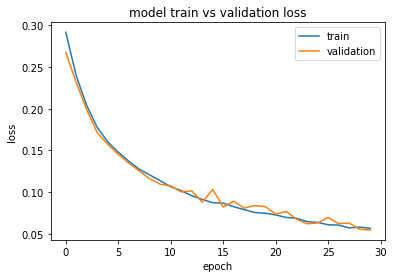

In [190]:
train_loss = lstm.history['loss']
val_loss = lstm.history['val_loss']
loss_graph(train_loss,val_loss)

In [191]:
train_loss = ker_model.history['loss']
val_loss = ker_model.history['val_loss']
loss_graph(train_loss,val_loss)

TypeError: 'History' object is not subscriptable

In [55]:
lstm_acc,lstm_cm,lstm_class = model_perfomance(y_pred,X_test)

NameError: name 'model_perfomance' is not defined

In [ ]:
#Drawing training and validation loss graph

plt.plot(lstm.history['loss'])
plt.plot(lstm.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

*KERAS MODEL*

*GRID SEARCH CV FOR KERAS*

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential

# Define a function to build your Keras model
def build_model(hidden_units=8, activation='relu', dropout_rate=0.0, num_layers=1):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation=activation))
    
    
    model.add(Dropout(dropout_rate))  # Adding a dropout layer
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create a KerasClassifier with the build_model function
model = KerasClassifier(build_fn=build_model, verbose=0)

# Define parameter grid for GridSearch
param_grid = {
    'hidden_units': [5,6,8,32],
    'batch_size' : [5,10,20,25],
    'dropout_rate': [0.0, 0.2, 0.4],
    'activation' : ['tanh','relu','sigmoid'],
    'num_layers': [1, 2, 3]
}

# Perform GridSearchCV
kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=kfold, verbose=1)
grid_out = grid_search.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_out.best_score_, grid_out.best_params_))

<ipython-input-97-286893264bb9>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=build_model, verbose=0)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed: 63.8min finished


Best: 0.934533 using {'activation': 'relu', 'batch_size': 5, 'dropout_rate': 0.0, 'hidden_units': 32, 'num_layers': 3}


In [ ]:
keras_model = estimator.fit(X_train,y_train)

In [ ]:
y_pred = estimator.predict(X_test)

In [ ]:
keras_acc,keras_cm,keras_class = model_perfomance(y_test,y_pred)

In [ ]:
keras_model.save(r'C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Keras\Keras_17_8.keras')  # The file needs to end with the .keras extension

In [5]:
ker_model = keras.models.load_model(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Keras\Keras_17_8.keras")

In [46]:
#model_perfomance(y_test,np.round(ker_model.predict(X_test)))
predict_prob = np.round(ker_model.predict(X_test_pro))

In [30]:
x_tocheck = X[103:358]
y_tocheck = Y[103:358]


In [4]:
model_perfomance(Y_test_am,predict_prob)

NameError: name 'model_perfomance' is not defined

In [ ]:
train_loss = lstm.history["tra"]

loss_graph(train_loss,val_loss)

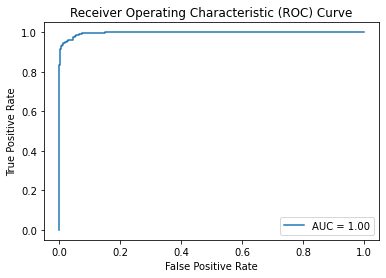

In [115]:
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [6]:
lstm_model = load_model(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\LSTM\old_lstm\\")

In [12]:
new_lstm = load_model(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\LSTM\\")

In [32]:
out = ker_model.predict(X_test_pro)

In [30]:
out = model_perfomance(Y_test_am,np.round(new_lstm.predict(X_test_pro)))

ValueError: Found input variables with inconsistent numbers of samples: [101, 257]

In [95]:
output = np.round(lstm_model.predict(dataframe[dataframe.columns[-8:-2]]))

In [99]:
message(out)

0.6621622

In [33]:
#Function to calculate the professionalism of the player and shows a message out.

def message(out):
    size = out
    toss = out[:15]
    mid = out[15:-15]
    hit = out[-15:]
    hit_am = np.count_nonzero(hit == 1)
    toss_am = np.count_nonzero(toss == 1)
    mid_am = np.count_nonzero(mid == 1)
    
    #print("---------------------",hit_am,toss_am,mid_am)
    flag_hit = 0
    flag_mid = 0
    flag_toss = 0
    
    value = out.mean()
    
    if value > 0.5:
        print("Hello.............\nYou are",int(value*100),"% Professional!!!")
    else:
        print("Hello.............\nYou are an unprofessional Player...")
    
    if hit_am > np.round(len(hit)/5):
        flag_hit = 1    
    if toss_am > np.round(len(toss)/5):  
        flag_toss = 1
    if mid_am > np.round(len(mid)/5):
        flag_mid = 1
    
    return flag_hit,flag_toss,flag_mid


hit,toss,mid = message(out)
#print(hit,toss,mid)

if hit and toss and mid == 0:
    print("Your way of tossing the ball and getting prepared for hitting the ball and the hit can be improved..")
elif hit and mid == 0:
    print("Your way of tossing the ball is Professional but hitting the ball and getting prepared for hitting the ball can be improved..")
elif hit and toss == 0:
    print("Your way of getting prepared for hitting the ball is Professional but tossing the ball and Hitting the ball can be improved..")
elif toss and mid == 0:
    print("Your way of Hitting the ball is more like a Professional but tossing the ball and getting prepared for hitting the ball can be improved..")

elif hit == 0:
    print("You are a good player but please improve your hit to be a professional player..")
elif toss == 0:
    print("You are a good player but please improve your ball toss to be a professional player..")
elif mid == 0:
    print("You are a good player but please improve your preperation to hit the ball to be a professional player..")
    
    
else:
    print("Your way of tossing, getting prepared to hit the ball and finally hitting the ball are a completely professional!!!!")


Hello.............
You are 87 % Professional!!!
You are a good player but please improve your hit to be a professional player..
